In [1]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio 
import plotly.colors as colors 
pio.templates.default = "plotly_white"

In [5]:
data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1') 

# Converting Date Columns

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 

Adding New Date-Based Columns

In [10]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

 

# Monthly Sales Analysis

In [11]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()

In [90]:
#Data Grouping:
#data.groupby('Order Month')['Sales'].sum() se har month ki total sales nikalte hain.
#.reset_index() data ko structured format me rakhta hai.
#px.line: Monthly sales trend show karne ke liye line chart banaya gaya hai.
#fig.show(): Graph display karta hai.


# Sales Analysis by Category

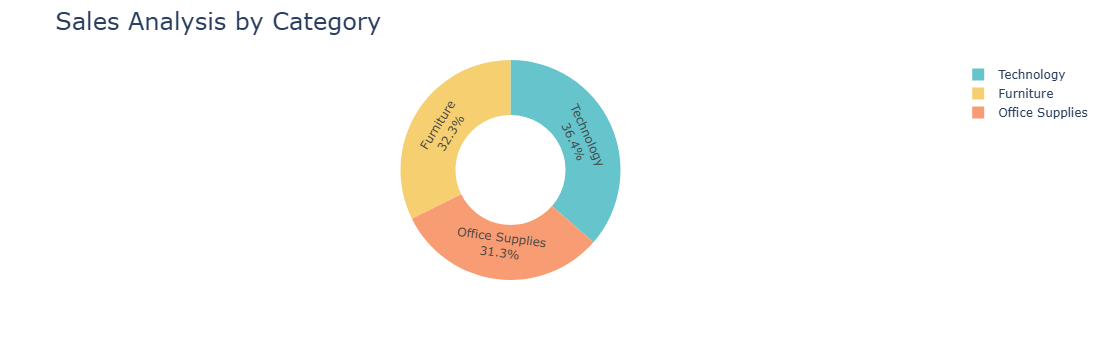

In [32]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

In [ ]:
#groupby('Category'): Category-wise sales nikalte hain.
#Pie Chart:
#px.pie: Sales proportions ko pie chart me show karta hai.
#hole=0.5: Donut-style chart banata hai.
#Pastel Colors: Chart me soft color palette use kiya gaya hai.


# Sales Analysis by Sub-Category

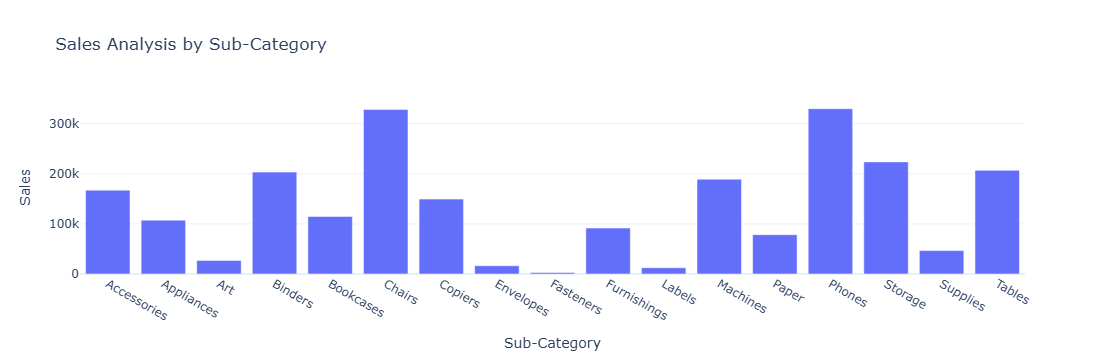

In [36]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

# Monthly Profit Analysis

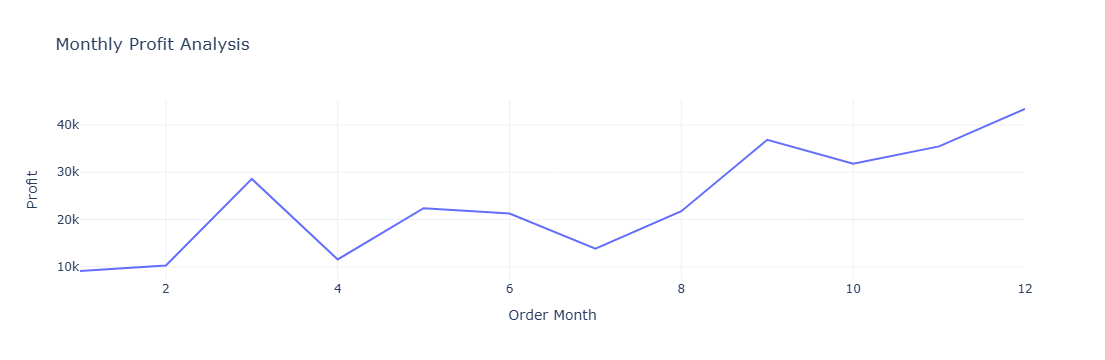

In [39]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()

# Profit Analysis by Category

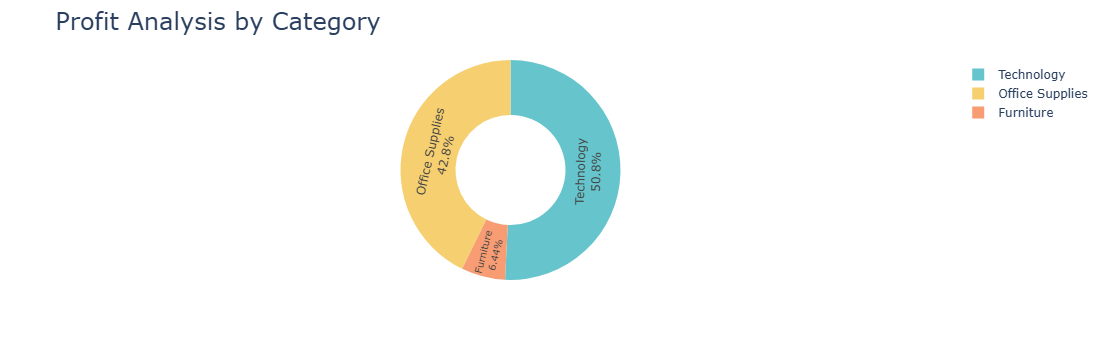

In [42]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

# Profit Analysis by Sub-Category

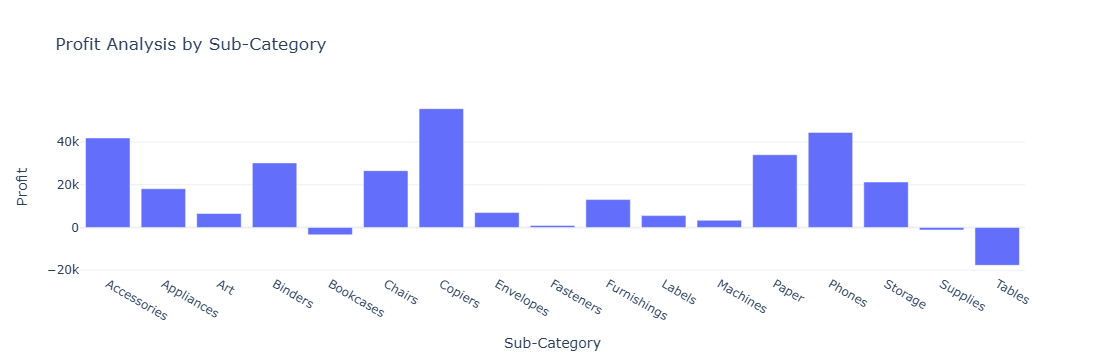

In [45]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

# Sales and Profit Analysis by Customer Segment

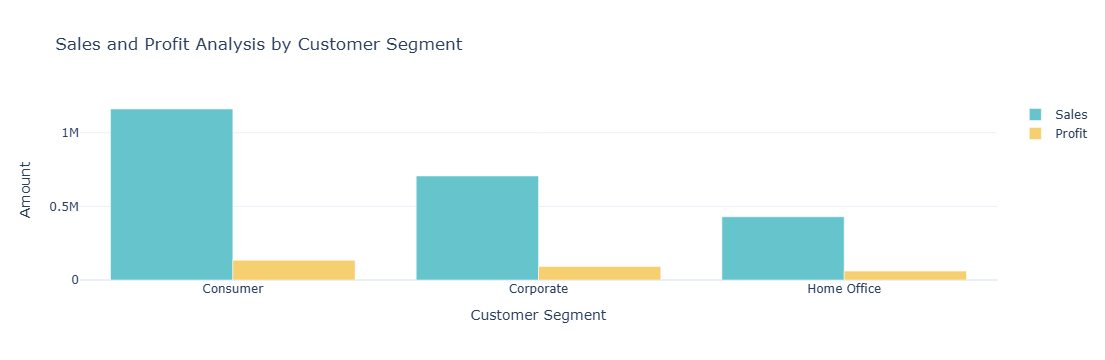

In [48]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

# analyse sales-to-profit ratio

In [51]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
